# Features in Dataset

Age: The age of the individual in years.
    
Sex: Gender of the individual (0 = Female, 1 = Male).
    
CP (Chest Pain Type): The type of chest pain experienced by the person, which is classified into different categories (e.g., typical angina, atypical angina, non-anginal pain, or asymptomatic).
    
Trestbps (Resting Blood Pressure): The individual's resting blood pressure (in mm Hg) at the time of admission to the hospital.

Chol (Cholesterol): The cholesterol level in the blood (in mg/dl).

Fbs (Fasting Blood Sugar): A binary variable indicating whether the fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false).

Restecg (Resting Electrocardiographic Results): The results of the resting electrocardiogram test, often represented in categorical form (e.g., normal, abnormal, or showing probable left ventricular hypertrophy).

Thalach (Maximum Heart Rate Achieved): The highest heart rate achieved during exercise.

Exang (Exercise Induced Angina): A binary variable indicating whether angina (chest pain) was induced during exercise (1 = yes, 0 = no).

Oldpeak: ST depression induced by exercise relative to rest.

Slope: The slope of the peak exercise ST segment (e.g., upsloping, flat, or downsloping).

Ca (Number of Major Vessels Colored by Fluoroscopy): The number of major blood vessels colored by fluoroscopy, indicating the number of blood vessels with poor blood flow.

Thal (Thallium Stress Test): Results of the thallium stress test used to observe blood flow to the heart (e.g., fixed defect, reversible defect).

Target: The target variable, which indicates the presence of a heart attack (1 = yes) or the absence of a heart attack (0 = no).

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset

df = pd.read_csv("D:\CS\File_handling\Heart Attack Data Set.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Checking Null values

df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

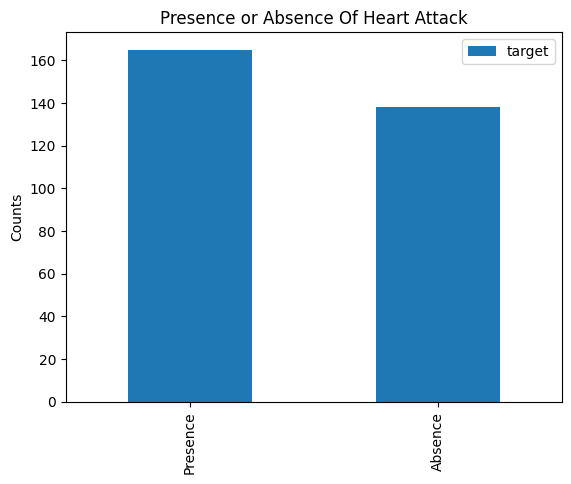

In [6]:
df_target = pd.DataFrame(df.target.value_counts())
df_target.index = ['Presence', 'Absence']

df_target.plot(kind='bar')
plt.title('Presence or Absence Of Heart Attack')
plt.ylabel('Counts')
plt.show()

In [7]:
# So the data is a balanced dataset

<Figure size 2000x2000 with 0 Axes>

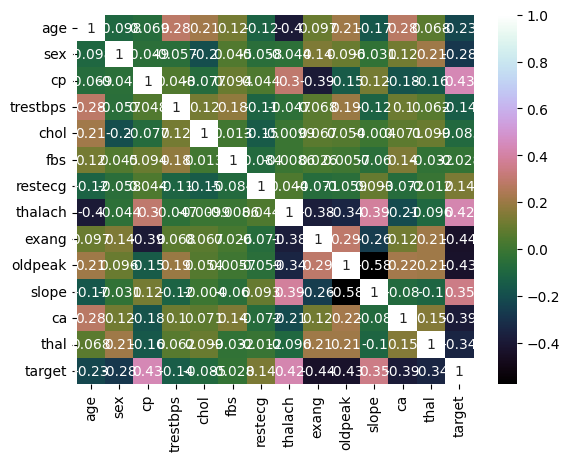

<Figure size 2000x2000 with 0 Axes>

In [8]:
# Feature Selection

sns.heatmap(data=df.corr(), annot=True, cmap='cubehelix')
plt.figure(figsize=(20,20))

# -------------EDA-------------

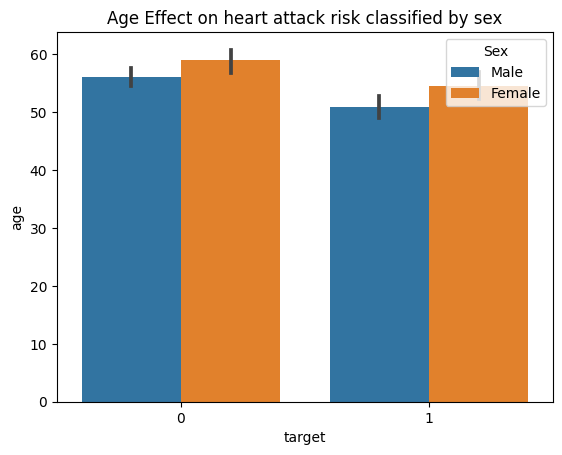

In [31]:
# 

df_ta = df.loc[:, ['target', 'age', 'sex']]
df_ta['sex'] = df_ta['sex'].map({0:'Female', 1:'Male'})

sns.barplot(data=df_ta, x='target', y='age', hue='sex')
plt.title('Age Effect on heart attack risk classified by sex')
plt.legend(title='Sex', loc='upper right')
plt.show()


Text(0.5, 1.0, 'Age Vs Cholestrol level')

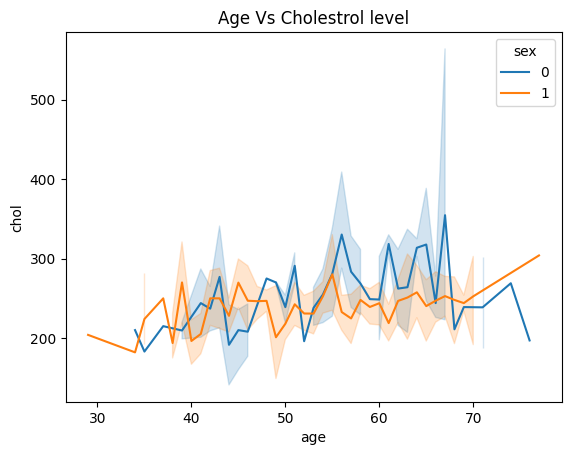

In [20]:
# 

sns.lineplot(data=df, x='age', y='chol', hue='sex')
plt.title('Age Vs Cholestrol level')


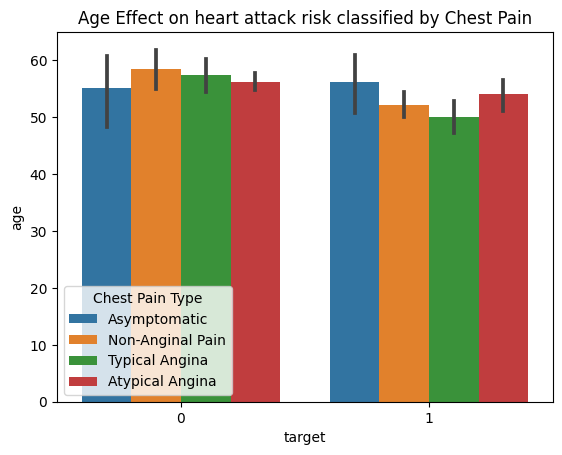

In [34]:
# 

df_chestpain = df.loc[:, ['target', 'age', 'cp']]
df_chestpain['cp'] = df_chestpain['cp'].map({1:'Typical Angina',
                                             0:'Atypical Angina',
                                             2:'Non-Anginal Pain',
                                             3: 'Asymptomatic'}
                                           )
sns.barplot(data=df_chestpain, x='target', y='age', hue='cp')
plt.title('Age Effect on heart attack risk classified by Chest Pain')
plt.legend(title='Chest Pain Type')

<AxesSubplot: >

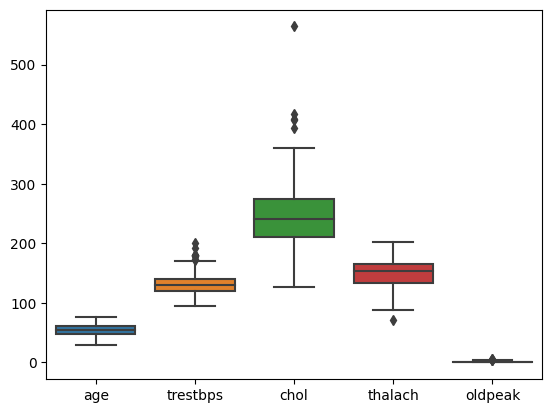

In [38]:
# 

sns.boxplot(data=df.iloc[:, [0,3,4,7,9]])

# --------------Modelling--------------

In [107]:
# Selecting Features and predictive variable

X = df.iloc[:, df.columns!='target']
y = df['target']

In [108]:
# Splitting X, y into training & testing datasets

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=5)

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
y_hat = lr_model.predict(X_test)

C:\Users\Deepak kumar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score

lr_score = accuracy_score(y_hat, y_test)
lr_score

0.9180327868852459

# KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,25))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    scores.append(accuracy_score(y_hat, y_test))
    

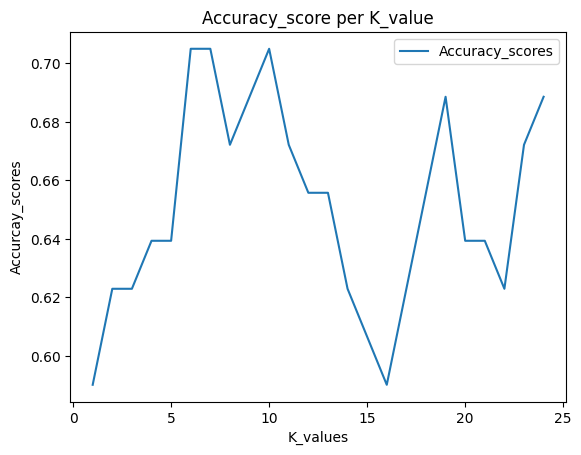

0.7049180327868853

In [112]:
df_knn = pd.DataFrame({
    'K_values':k_values,
    'Accuracy_scores':scores
})
df_knn.plot(kind='line',
           x='K_values',
           y='Accuracy_scores')
plt.title('Accuracy_score per K_value')
plt.ylabel('Accurcay_scores')
plt.show()

knn_score = max(scores)
knn_score

# Decision Tree 

In [113]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

In [114]:
tree_score = accuracy_score(y_hat, y_test)
tree_score

0.819672131147541

# Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

y_hat = forest_model.predict(X_test)

In [116]:
forest_score = accuracy_score(y_hat, y_test)
forest_score

0.8852459016393442

# SVM

In [117]:
from sklearn.svm import SVC            # Support Vector Classifier
svm_model = SVC(kernel='linear', C=10)     # linear kernel 

svm_model.fit(X_train, y_train)

y_hat = svm_model.predict(X_test)

In [118]:
svm_score = accuracy_score(y_hat, y_test)
svm_score

0.9180327868852459

# Accuracy Scores of all Models

In [123]:
df_score = pd.DataFrame({
    'Models':['LogisticRegression', 'KNN', 'DecisionTree', 'RandomForest', 'svm'],
    'Scores':[lr_score, knn_score, tree_score, forest_score, svm_score]
})


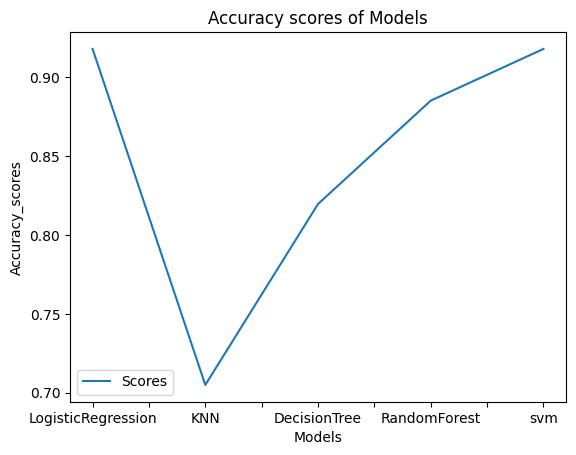

In [124]:
df_score.plot(kind='line',
             x='Models',
             y='Scores')
plt.title('Accuracy scores of Models')
plt.ylabel('Accuracy_scores')
plt.show()

In [125]:
# Lowest score is of KNN model
# Highest score is of LogisticRegression model and svm model